In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
import seaborn as sns
import datetime

In [5]:
warnings.filterwarnings('ignore')

# Task -1 :  Import the "City_Air_Quality.csv" dataset. 

In [7]:
df = pd.read_csv("city_day.csv")

# Task -2: Explore the dataset to understand its structure and content.

In [9]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [10]:
df.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [12]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [13]:
df.shape

(29531, 16)

# Task- 4: Create line plots or time series plots to visualize the overall AQI trend over time.

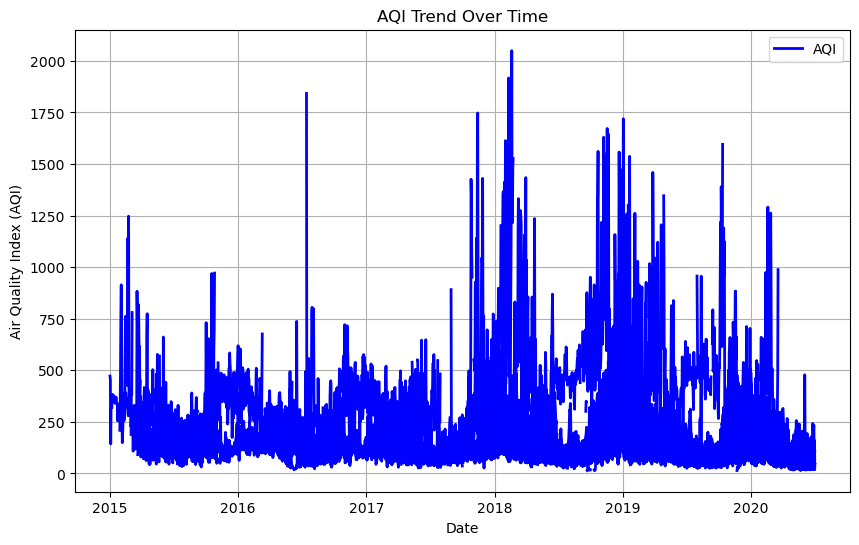

In [15]:
# Convert 'Date' column to datetime for easier plotting
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['AQI'], label='AQI', color='blue', linewidth=2)
plt.title('AQI Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Air Quality Index (AQI)')
plt.legend()
plt.grid(True)
plt.show()

# Task - 5:Plot individual pollutant levels (e.g., PM2.5, PM10, CO) on separate line plots to visualize their trends over time. 

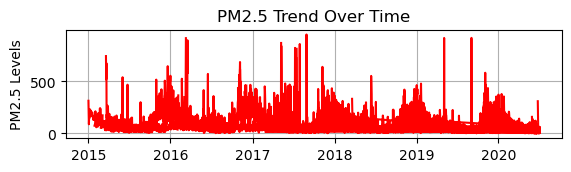

In [34]:
# Plot for PM2.5
plt.subplot(3, 1, 1)
plt.plot(df['Date'], df['PM2.5'], color='red', label='PM2.5')
plt.title('PM2.5 Trend Over Time')
plt.ylabel('PM2.5 Levels')
plt.grid(True)

# Task - 6: Use bar plots or stacked bar plots to compare the AQI values across different dates or time periods.

In [55]:
# Convert the 'Date' column to datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date as the index if needed
df.set_index('Date', inplace=True)

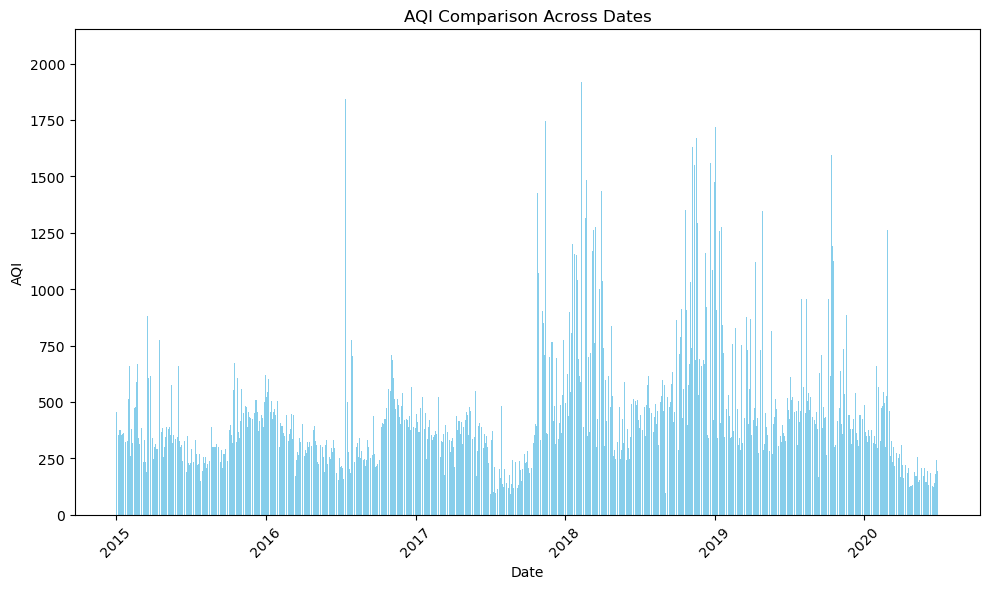

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['AQI'], color='skyblue')
plt.title('AQI Comparison Across Dates')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task - 7: Create box plots or violin plots to analyze the distribution of AQI values for different pollutant categories. 

In [67]:
pollutants = ['NO', 'NO2','NH3', 'CO', 'SO2', 'O3']

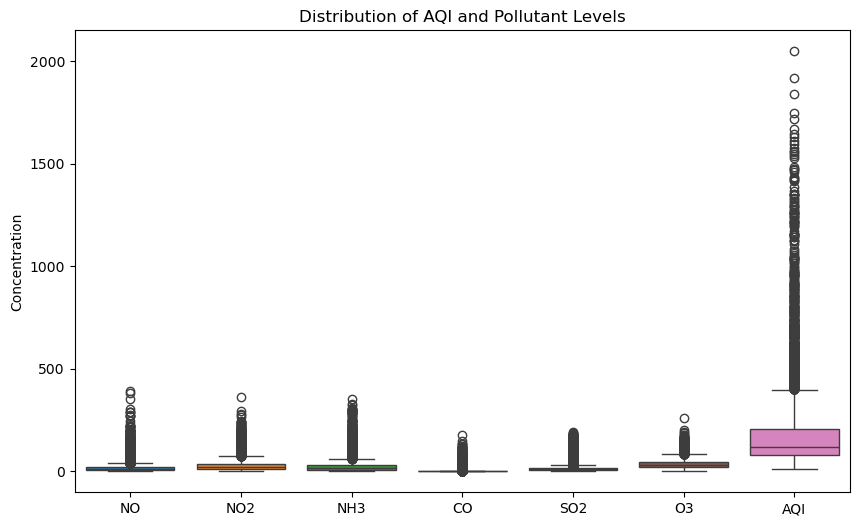

In [79]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[pollutants + ['AQI']])
plt.title('Distribution of AQI and Pollutant Levels')
plt.ylabel('Concentration')
plt.show()

# Task- 8: Use scatter plots or bubble charts to explore the relationship between AQI values and pollutant levels.

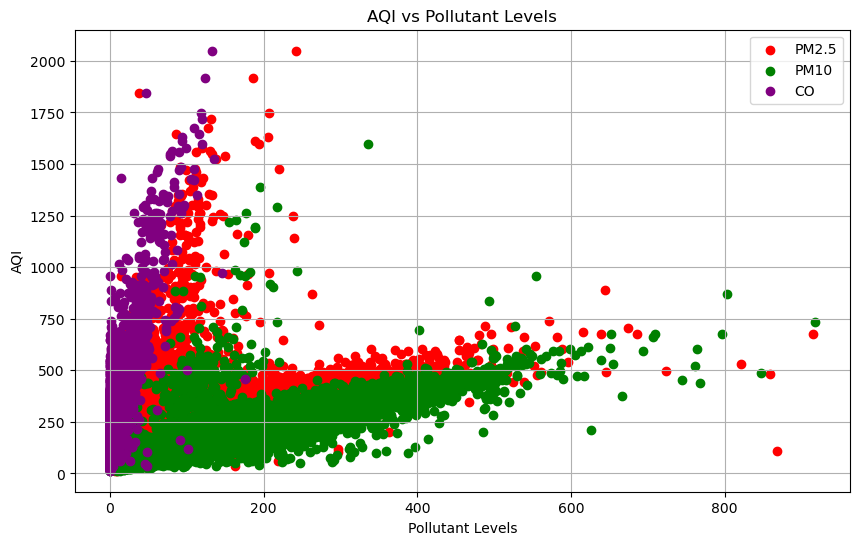

In [83]:
 plt.figure(figsize=(10,6))
 # Scatter plot for AQI vs PM2.5
 plt.scatter(df['PM2.5'], df['AQI'], color='red', label='PM2.5')
 plt.scatter(df['PM10'], df['AQI'], color='green', label='PM10')
 plt.scatter(df['CO'], df['AQI'], color='purple', label='CO')
 plt.title('AQI vs Pollutant Levels')
 plt.xlabel('Pollutant Levels')
 plt.ylabel('AQI')
 plt.legend()
 plt.grid(True)
 plt.show()

# Task - 9: Customize the visualizations by adding labels, titles, legends, and appropriate color schemes

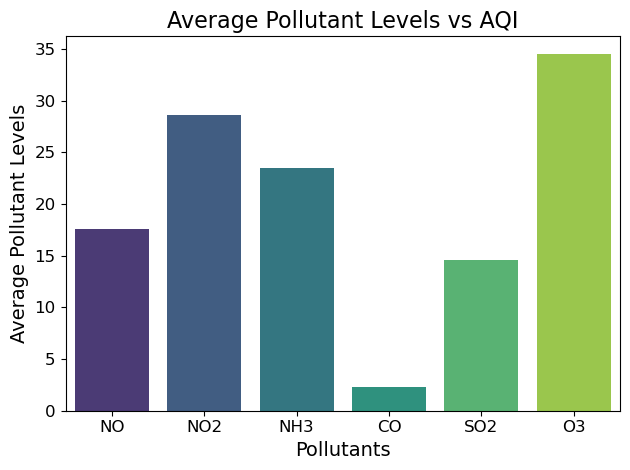

In [93]:
# Calculate the mean AQI for each pollutant across all dates
mean_pollutant_values = df[pollutants].mean()


# Create a bar plot to compare the mean AQI values for each pollutant
sns.barplot(x=mean_pollutant_values.index, y=mean_pollutant_values.values, palette="viridis")

# Customize the plot
plt.title('Average Pollutant Levels vs AQI', fontsize=16)
plt.xlabel('Pollutants', fontsize=14)
plt.ylabel('Average Pollutant Levels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()